In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

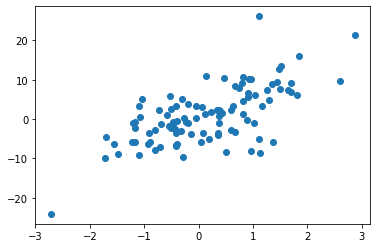

In [15]:
x_1 = np.random.randn(100)
x_2 = np.random.randn(100)
y = 4*x_1 + 5*x_2 + np.random.randn(100) 
plt.plot(x_1, y, 'o')

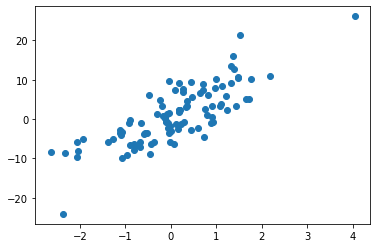

In [16]:
plt.plot(x_2, y, 'o')

In [93]:
X = np.c_[np.ones(100), x_1, x_2]
theta = (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)

In [94]:
X.shape

(100, 3)

In [110]:
theta = theta.reshape(1, -1)

In [111]:
theta

array([[-0.03242178,  4.14933305,  4.97757167]])

In [112]:
pred = X.dot(theta.T)

In [114]:
pred

array([[-6.10715718e+00],
       [ 8.29945969e+00],
       [ 2.36758870e+00],
       [ 6.86622348e+00],
       [ 4.58626257e+00],
       [ 3.56587482e+00],
       [ 8.29959926e+00],
       [-3.89082870e-01],
       [-1.16198429e+00],
       [ 3.34620619e+00],
       [ 2.42086301e+00],
       [-8.71533616e-01],
       [-5.68979071e-01],
       [ 7.93181101e+00],
       [ 1.80659503e+00],
       [ 6.17712051e-01],
       [-1.15354467e+01],
       [-9.76131185e-01],
       [ 4.37701284e+00],
       [-4.92351037e+00],
       [-1.48033778e+00],
       [ 3.82095225e+00],
       [ 1.29646190e+01],
       [ 1.28693114e+01],
       [ 4.13872202e+00],
       [-1.10822080e+01],
       [ 8.83225901e+00],
       [-6.03357263e+00],
       [ 1.82705896e+00],
       [-3.42912172e+00],
       [ 1.13376383e+01],
       [ 4.24291241e+00],
       [-3.47829579e+00],
       [-4.34574257e+00],
       [-6.22337610e+00],
       [ 9.03673829e+00],
       [-5.71177172e+00],
       [ 8.20244103e+00],
       [-1.7

In [115]:
theta

array([[-0.03242178,  4.14933305,  4.97757167]])

In [143]:
from sklearn.linear_model import LinearRegression

In [118]:
feature = np.c_[x_1, x_2]

In [119]:
feature

array([[-1.56057385,  0.08048206],
       [ 0.66527085,  1.11931108],
       [ 0.33701909,  0.20122383],
       [ 0.90448718,  0.63196011],
       [-0.20051068,  1.095046  ],
       [-0.42007308,  1.07307741],
       [ 1.03159544,  0.81396879],
       [ 1.01079153, -0.9142554 ],
       [-0.19861675, -0.06136234],
       [ 0.60143502,  0.17741055],
       [ 0.37230786,  0.18250977],
       [-0.05434634, -0.12327513],
       [-0.46509524,  0.27991114],
       [ 1.70638255,  0.17757319],
       [ 0.8157083 , -0.3105186 ],
       [ 0.37309283, -0.18039973],
       [-0.29092652, -2.06845317],
       [-0.42836029,  0.16749133],
       [ 0.62639671,  0.36369262],
       [-1.16842082, -0.00862297],
       [-0.23211058, -0.09739928],
       [ 1.1700467 , -0.20121045],
       [ 1.46839973,  1.38705411],
       [ 1.50880039,  1.33422848],
       [ 1.28814191, -0.23581499],
       [ 0.51112649, -2.64599308],
       [ 0.95330304,  0.98624576],
       [-0.9334804 , -0.4274835 ],
       [ 0.2195746 ,

In [120]:
model = LinearRegression()
model.fit(feature, y)

LinearRegression()

In [121]:
model.intercept_

-0.03242178106800231

In [122]:
model.coef_

array([4.14933305, 4.97757167])

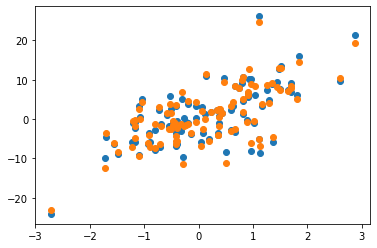

In [131]:
plt.plot(x_1, y, 'o')
plt.plot(x_1, pred[:, 0], 'o')

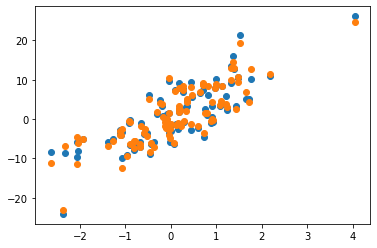

In [130]:
plt.plot(x_2, y, 'o')
plt.plot(x_2, pred[:, 0], 'o')

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [129]:
r2_score(y, pred[:, 0])

0.9792648829446995

$$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 $$

$$ \theta_1 = \frac{\sum\limits_{i=0}^N (x_1 - \bar {x_1})(y_i - \bar y)} {\sum\limits_{i=0}^N (x_1 - \bar {x_1})^2} $$

$$ \theta_2 = \frac{\sum\limits_{i=0}^N (x_2 - \bar {x_2})(y_i - \bar y)} {\sum\limits_{i=0}^N (x_2 - \bar {x_2})^2} $$

In [133]:
theta_1 = (((x_1 - x_1.mean()) * (y - y.mean())).sum())/(((x_1 - x_1.mean())**2).sum())

In [134]:
theta_1

4.765833129949259

In [135]:
theta_2 = (((x_2 - x_2.mean()) * (y - y.mean())).sum())/(((x_2 - x_2.mean())**2).sum())

In [136]:
theta_2

5.427060523476893

In [137]:
theta_0 = y.mean() - (theta_1*x_1.mean() + theta_2*x_2.mean())

In [138]:
theta_0

-0.1601416573596368

In [140]:
pred_1 = (theta_0 + theta_1*x_1 + theta_2*x_2)
r2_score(y, pred_1)

0.9661260611924096

In [177]:
class MyLinearRegression:
    def __init__(self):
        self._coef = None
        self._intercept = None
    
    def fit(self, feature, target):
        """This method will make our model learn and find the best values 
        of coeffiecient and intercept"""
        feature = np.array(feature)
        target = np.array(target)
        X = np.c_[np.ones(len(feature)), feature]
        self.theta = (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(target)
        self.coef_ = self.theta[1:]
        self.intercept_ = self.theta[0]
        
    def predict(self, X_test):
        try:
            len(X_test)
        except:
            raise ValueError("Testing Data Should Be Iterable Object") 
        else:
            X = np.array(X_test)
            X = np.c_[np.ones(len(X_test)), X]
            y_test = self.theta.dot(X.T)
            return y_test
        
    def mean_absolute_error(self, y, y_hat):
        return (abs((y - y_hat)).sum())/len(y)
    
    def mean_square_error(self, y, y_hat):
        return (((y - y_hat)**2).sum())/len(y)
    
    def rmse(self, y, y_hat):
        return np.sqrt((((y - y_hat)**2).sum())/len(y))

    def r2_score(self, y, y_hat):
        r2score = 1 - (sum((y - y_hat)**2) / sum((y - y.mean())**2))
        return r2score

In [178]:
mymodel = MyLinearRegression()
model = LinearRegression()

In [145]:
from sklearn.datasets import load_boston

In [146]:
boston = load_boston()

In [147]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [148]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [149]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [159]:
cols = np.append(boston.feature_names, ['price'])

In [160]:
df = pd.DataFrame(np.c_[boston.data, boston.target], columns=cols)

In [161]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [165]:
df.corr()['price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64

In [179]:
model.fit(boston.data, boston.target)
mymodel.fit(boston.data, boston.target)

In [169]:
mymodel.fit(boston.data, boston.target)

In [180]:
model.coef_.__len__()

13

In [171]:
boston.data.shape

(506, 13)

In [181]:
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [182]:
mymodel.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [183]:
model.intercept_

36.459488385089855

In [184]:
mymodel.intercept_

36.45948838506404

In [185]:
pred = model.predict(boston.data)
mypred = mymodel.predict(boston.data)
print('\n Accuracy of training data of my model is : ', r2_score(boston.target, mypred)*100)
print('\n Accuracy of training data of inbuilt model is : ', r2_score(boston.target, pred)*100)


 Accuracy of training data of my model is :  74.06426641094093

 Accuracy of training data of inbuilt model is :  74.06426641094095


    Choose any data that should have some linear relation and make a report